# P07: data tables and pandas

## Concepts

### Modules / libraries

### data tables

### Operations on data tables

## Python

### libraries

import, as, from .. import .. as ..

### pandas

Series

data frame

slicing/indexing: [], .loc[,], .iloc[,],

selecting, filtering, summarizing, grouping




# Scientific Computing

<div class="alert alert-success">
<b>Scientific Computing</b> is the application of computer programming to scientific applications: data analysis, simulation & modelling, plotting, etc.
</div>

## Scientific Python: Scipy Stack

Scipy = Scientific Python

- `scipy`
- `numpy`
- `pandas`
- Data Analysis in Python

<div class="alert alert-success">
<b><code>Scipy</code></b> is an <i>ecosystem</i>, including a collection of open-source packages for scientific computing in Python.
</div>

A 'family' of packages that all work well together to do scientific computing.

Not made by the same people who manage the standard library.

## Homogenous Data

- for example: store data of the same type (i.e. all numerics)
- recordings of values from experimental participants
- heights or quantitative information from survey data

Lists are a start, and lists of lists are possible.

But, they can get nightmareish.

So we use arrays.

### `numpy`

**`numpy`** - stands for numerical python

**arrays** - work with arrays (matrices)

Allow you to efficiently operate on arrays (linear algebra, matrix operations, etc.)

In [1]:
# to install a package
# on datahub
!pip install --user name_of_package

ERROR: Could not find a version that satisfies the requirement name_of_package (from versions: none)
ERROR: No matching distribution found for name_of_package


In [2]:
import numpy as np

In [3]:
# Create some arrays of data
arr0 = np.array([1, 2, 3])
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

In [4]:
arr1

array([[1, 2],
       [3, 4]])

In [5]:
# lists of lists don't store dimensionality well
[[1, 2], [3, 4]]

[[1, 2], [3, 4]]

#### Indexing Arrays

In [6]:
# Check out an array of data
arr1

array([[1, 2],
       [3, 4]])

`numpy` arrays are an object type...so they have associated attributes (below) and methods (we'll get to these in a second)!

In [7]:
# Check the shape of the array
arr1.shape

(2, 2)

In [8]:
# Index into a numpy array
arr1[0, 0]

1

Working with N-dimensional (multidimensional) arrays is easy within `numpy`.

#### Notes on Arrays

In [9]:
# arrays are most helpful when they
# have the same length in each list
np.array([[1, 2, 3, 4], [2, 3, 4]])

<ipython-input-9-f5cb58781ee8>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([[1, 2, 3, 4], [2, 3, 4]])


array([list([1, 2, 3, 4]), list([2, 3, 4])], dtype=object)

In [10]:
# arrays are meant to store homogeneous data
np.array([[1, 2, 'cogs18'], [2, 3, 4]])

array([['1', '2', 'cogs18'],
       ['2', '3', '4']], dtype='<U21')

#### Working with Arrays

(Things you can't do with lists)

In [11]:
# Add arrays together
arr1 + arr2

array([[ 6,  8],
       [10, 12]])

In [12]:
# Matrix multiplication
arr1 * arr2

array([[ 5, 12],
       [21, 32]])

#### A brief aside: `zip()`

`zip()` takes two iterables (things you can loop over) and loop over them together.

In [13]:
for a, b in zip([1, 2], ['a', 'b']):
    print(a, b)

1 a
2 b


#### Clicker Question #1

Given the following code, what will it print out?

In [14]:
data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8]])

In [15]:
data[0, :]

array([1, 2, 3, 4])

In [16]:
data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8]])

output = []
for d1, d2 in zip(data[0, :], data[1, :]):
    output.append(d1 + d2)

print(output)

[6, 8, 10, 12]


- A) [1, 2, 3, 4]
- B) [1, 2, 3, 4, 5, 6, 7, 8]
- C) [6, 8, 10, 12]
- D) [10, 26]
- E) [36]

Note that if you find yourself looping over arrays...there is probably a better way.

In [17]:
# take a look at array
data

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [18]:
# sum method
# by default sums all values in array
data.sum()

36

In [19]:
# sum method
# has an axis parameter
# axis=0 sums across columns
data.sum(axis=0)

array([ 6,  8, 10, 12])

In [20]:
# typecasting to a different variable type
out_list = data.sum(axis=0).tolist()
print(out_list)
type(out_list)

[6, 8, 10, 12]


list

What if you wanted to find the max value in an array...there's a method for that!

In [21]:
# find max value in array
max_val = data.max()
max_val

8

But what if you wanted to know not what the max value was...but where in your original array that value was found.

There are also *functions* in `numpy` that operate on arrays.

In [22]:
data

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [23]:
# see documentation for np.where()
np.where?

In [24]:
# find position in array with max value
out = np.where(data == max_val)
out

(array([1]), array([3]))

In [25]:
# check to be sure
data[1,3]

8

## Heterogenous Data

- have continuous (numeric) and categorical (discrete) data
- different data types need to be stored
- uses a DataFrame object (think: spreadsheet)
- allows for column and row labels

### pandas

Pandas is Python library for managing heterogenous data.

At its core, Pandas is used for the **DataFrame** object, which is:
- a data structure for labeled rows and columns of data
- associated methods and utilities for working with data.
- each column contains a `pandas` **Series**

In [26]:
import pandas as pd

In [27]:
# Create some example heterogenous data
d1 = {'Subj_ID': '001', 'score': 16, 'group' : 2, 'condition': 'cognition'}
d2 = {'Subj_ID': '002', 'score': 22, 'group' : 1, 'condition': 'perception'}
d3 = {'Subj_ID': '003', 'score': 18, 'group' : 1, 'condition': 'perception'}

In [28]:
# Create a dataframe
df = pd.DataFrame([d1, d2, d3], [0, 1, 2])

In [29]:
# Check out the dataframe
df

,Subj_ID,score,group,condition
0,001,16,2,cognition
1,002,22,1,perception
2,003,18,1,perception


In [30]:
# You can index in pandas
# columns store information in series
df['condition']

0     cognition
1    perception
2    perception
Name: condition, dtype: object

In [31]:
# You can index in pandas
# loc specifies row, column position
df.loc[0,:]

Subj_ID            001
score               16
group                2
condition    cognition
Name: 0, dtype: object

In [32]:
# attribute of df object
# row, columns
df.shape

(3, 4)

#### Working with DataFrames

There are *a lot* of functions and methods within `pandas`. The general syntax is `df.method()` where the `method()` operates directly on the dataframe `df`.

In [33]:
# calculate summary statistics
df.describe()

,score,group
count,3.000000,3.000000
mean,18.666667,1.333333
std,3.055050,0.577350
min,16.000000,1.000000
25%,17.000000,1.000000
50%,18.000000,1.000000
75%,20.000000,1.500000
max,22.000000,2.000000


In [34]:
# Take the average of all numeric columns
df.mean()

Subj_ID    334001.000000
score          18.666667
group           1.333333
dtype: float64

In [35]:
# breakdown of how many of each category there are
val_counts = df['condition'].value_counts()
val_counts

perception    2
cognition     1
Name: condition, dtype: int64

In [36]:
# which unique values are there in condition?
df['condition'].unique()

array(['cognition', 'perception'], dtype=object)

In [37]:
# how many unique values are there
len(df['condition'].unique())
# equivalent to
df['condition'].nunique()

2

In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
# how many rows there are in a series/df
len(df)

3

In [40]:
# what's the category that shows up the most
val_counts.idxmax()

'perception'

In [41]:
# what's the count of the value that shows up the most
val_counts.max()

2

#### Clicker Question #2

Comparing them to standard library Python types, which is the best mapping for these new data types?

- A) DataFrames are like lists, arrays are like tuples
- B) DataFrames and arrays are like lists
- C) DataFrames are like tuples, arrays are like lists
- D) DataFrames and arrays are like dictionaries
- E) Dataframes are like dictionaries, arrays are like lists

## Plotting

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt

In [43]:
# Create some data
dat = np.array([1, 2, 4, 8, 16, 32])

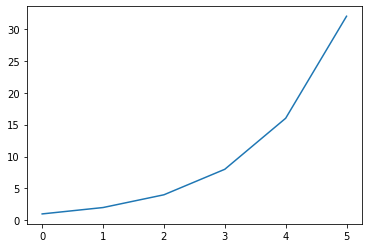

In [44]:
# Plot the data
plt.plot(dat);

- can change plot type
- _lots_ of customizations possible

## Analysis

- `scipy` - statistical analysis
- `sklearn` - machine learning

In [45]:
import scipy as sp
from scipy import stats

In [46]:
# Simulate some data
d1 = stats.norm.rvs(loc=0, size=1000)
d2 = stats.norm.rvs(loc=0.5, size=1000)

### Analysis - Plotting the Data

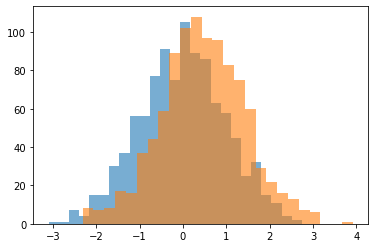

In [47]:
# Plot the data
plt.hist(d1, 25, alpha=0.6);
plt.hist(d2, 25, alpha=0.6);

### Analysis - Statistical Comparisons

In [48]:
# Statistically compare the two distributions
stats.ttest_ind(d1, d2)

Ttest_indResult(statistic=-10.52525616445794, pvalue=2.9852144334579724e-25)

## COGS108: Data Science in Practice

<div class="alert alert-info">
If you are interested in data science and scientific computing in Python, consider taking <b>COGS108</b> : <a>https://github.com/COGS108/</a>.
</div>